# Importação de bibliotecas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 
import mplcyberpunk

# Coletando as cotações históricas

In [2]:
tickers = ['^BVSP', '^GSPC', 'BRL=X']

In [3]:
dados_mercado = yf.download(tickers, period = '6mo')

dados_mercado = dados_mercado['Adj Close']
dados_mercado

[*********************100%***********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.000,5408.419922


# Tratamento de dados

In [4]:
dados_mercado.isnull().sum()

Ticker
BRL=X    0
^BVSP    3
^GSPC    5
dtype: int64

In [5]:
dados_mercado = dados_mercado.dropna()

In [6]:
dados_mercado.columns = ['DOLAR', 'IBOVESPA', 'S&P500']

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.000,5408.419922


# Criar gráficos de performace

In [7]:
plt.style.use('cyberpunk')

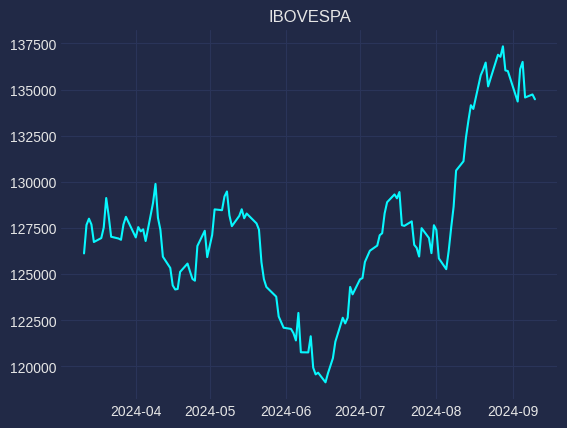

In [8]:
plt.plot(dados_mercado['IBOVESPA'])
plt.title('IBOVESPA')

diretorio_figuras = '/home/petee/kaio_personal/python_applications/financas_minicurso/graficos'
plt.savefig(diretorio_figuras + '/ibovespa.png')


plt.show()


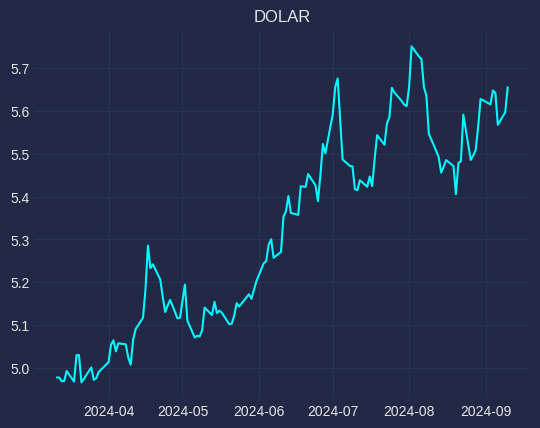

In [10]:
plt.plot(dados_mercado['DOLAR'])
plt.title('DOLAR')

diretorio_figuras = '/home/petee/kaio_personal/python_applications/financas_minicurso/graficos'
plt.savefig(diretorio_figuras + '/dolar.png')


plt.show()

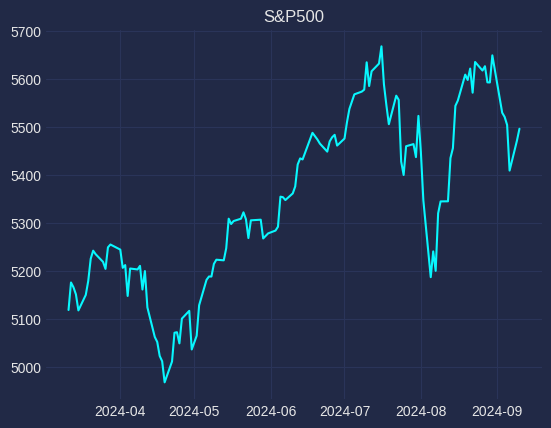

In [11]:
plt.plot(dados_mercado['S&P500'])
plt.title('S&P500')

diretorio_figuras = '/home/petee/kaio_personal/python_applications/financas_minicurso/graficos'
plt.savefig(diretorio_figuras + '/s&p500.png')


plt.show()

# Calcular retornos diários

In [16]:
retornos_diarios = dados_mercado.pct_change()

retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,NaN,NaN,NaN
2024-03-12 00:00:00+00:00,-0.000028,0.012242,0.011202
2024-03-13 00:00:00+00:00,-0.001748,0.002647,-0.001925
2024-03-14 00:00:00+00:00,0.000101,-0.002469,-0.002871
2024-03-15 00:00:00+00:00,0.004729,-0.007424,-0.006483
...,...,...,...
2024-09-04 00:00:00+00:00,0.005770,0.013085,-0.001603
2024-09-05 00:00:00+00:00,-0.000974,0.002873,-0.003018
2024-09-06 00:00:00+00:00,-0.013205,-0.014139,-0.017260


In [18]:
retornos_diarios = dados_mercado.pct_change(periods = 5)

retornos_diarios.head(10)

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,NaN,NaN,NaN
2024-03-12 00:00:00+00:00,NaN,NaN,NaN
2024-03-13 00:00:00+00:00,NaN,NaN,NaN
2024-03-14 00:00:00+00:00,NaN,NaN,NaN
2024-03-15 00:00:00+00:00,NaN,NaN,NaN
2024-03-18 00:00:00+00:00,-0.001907,0.006581,0.006151
2024-03-19 00:00:00+00:00,0.010447,-0.001089,0.000626
2024-03-20 00:00:00+00:00,0.012337,0.008742,0.011482
2024-03-21 00:00:00+00:00,-0.000604,0.003673,0.017678
